In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, UpSampling2D, Concatenate, Add
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adadelta
from matplotlib import pyplot as plt
import numpy as np

# Keras

## Sequential model

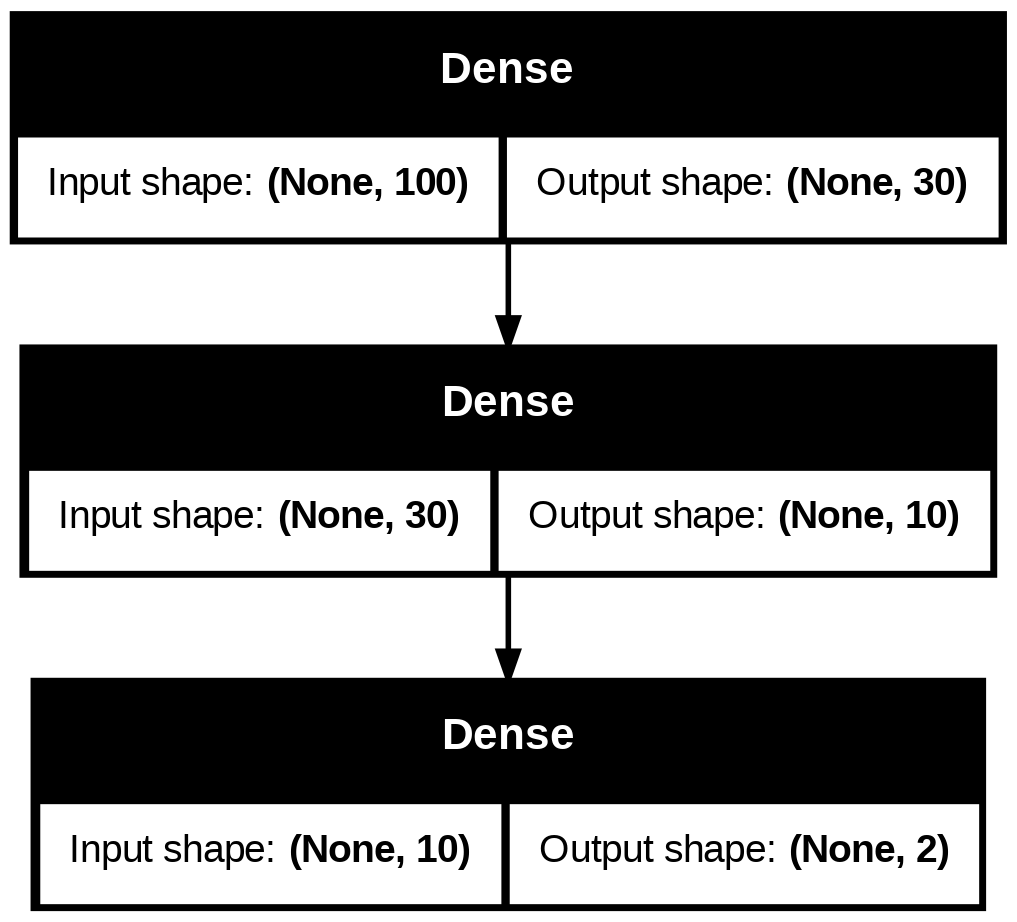

In [9]:
# define the model
model = Sequential()
model.add(Input(shape=(100,)))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(2))
tf.keras.utils.plot_model(model, show_shapes=True)

## Functional model

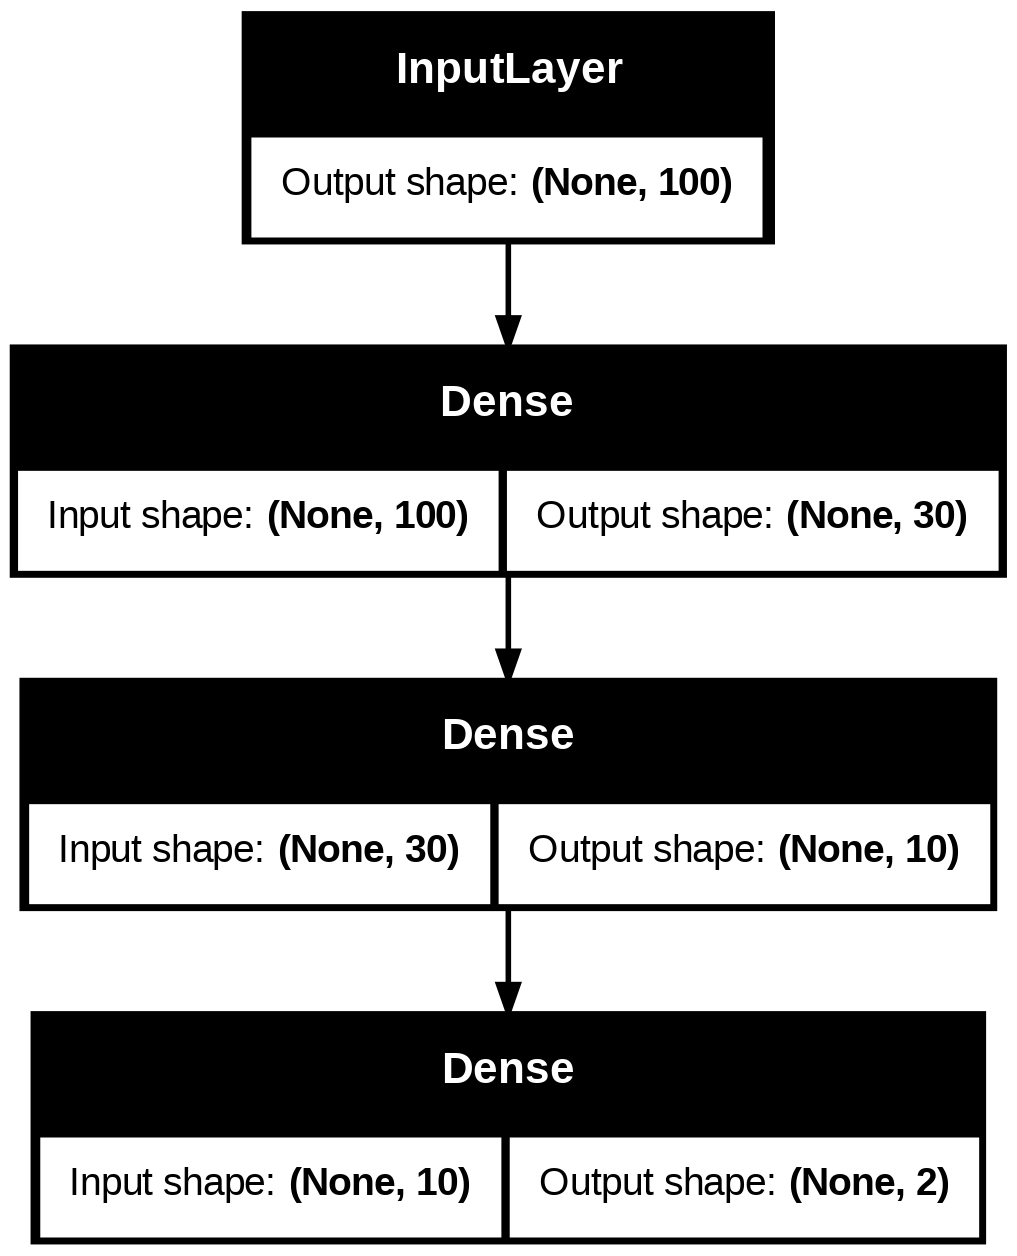

In [10]:
# define the layers
x_in = Input(shape=(100,))
x = Dense(30)(x_in)
x = Dense(10)(x)
x_out = Dense(2)(x)
# define the model
model = Model(inputs=x_in, outputs=x_out)
tf.keras.utils.plot_model(model, show_shapes=True)

The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.


**Multiple inputs and outputs**

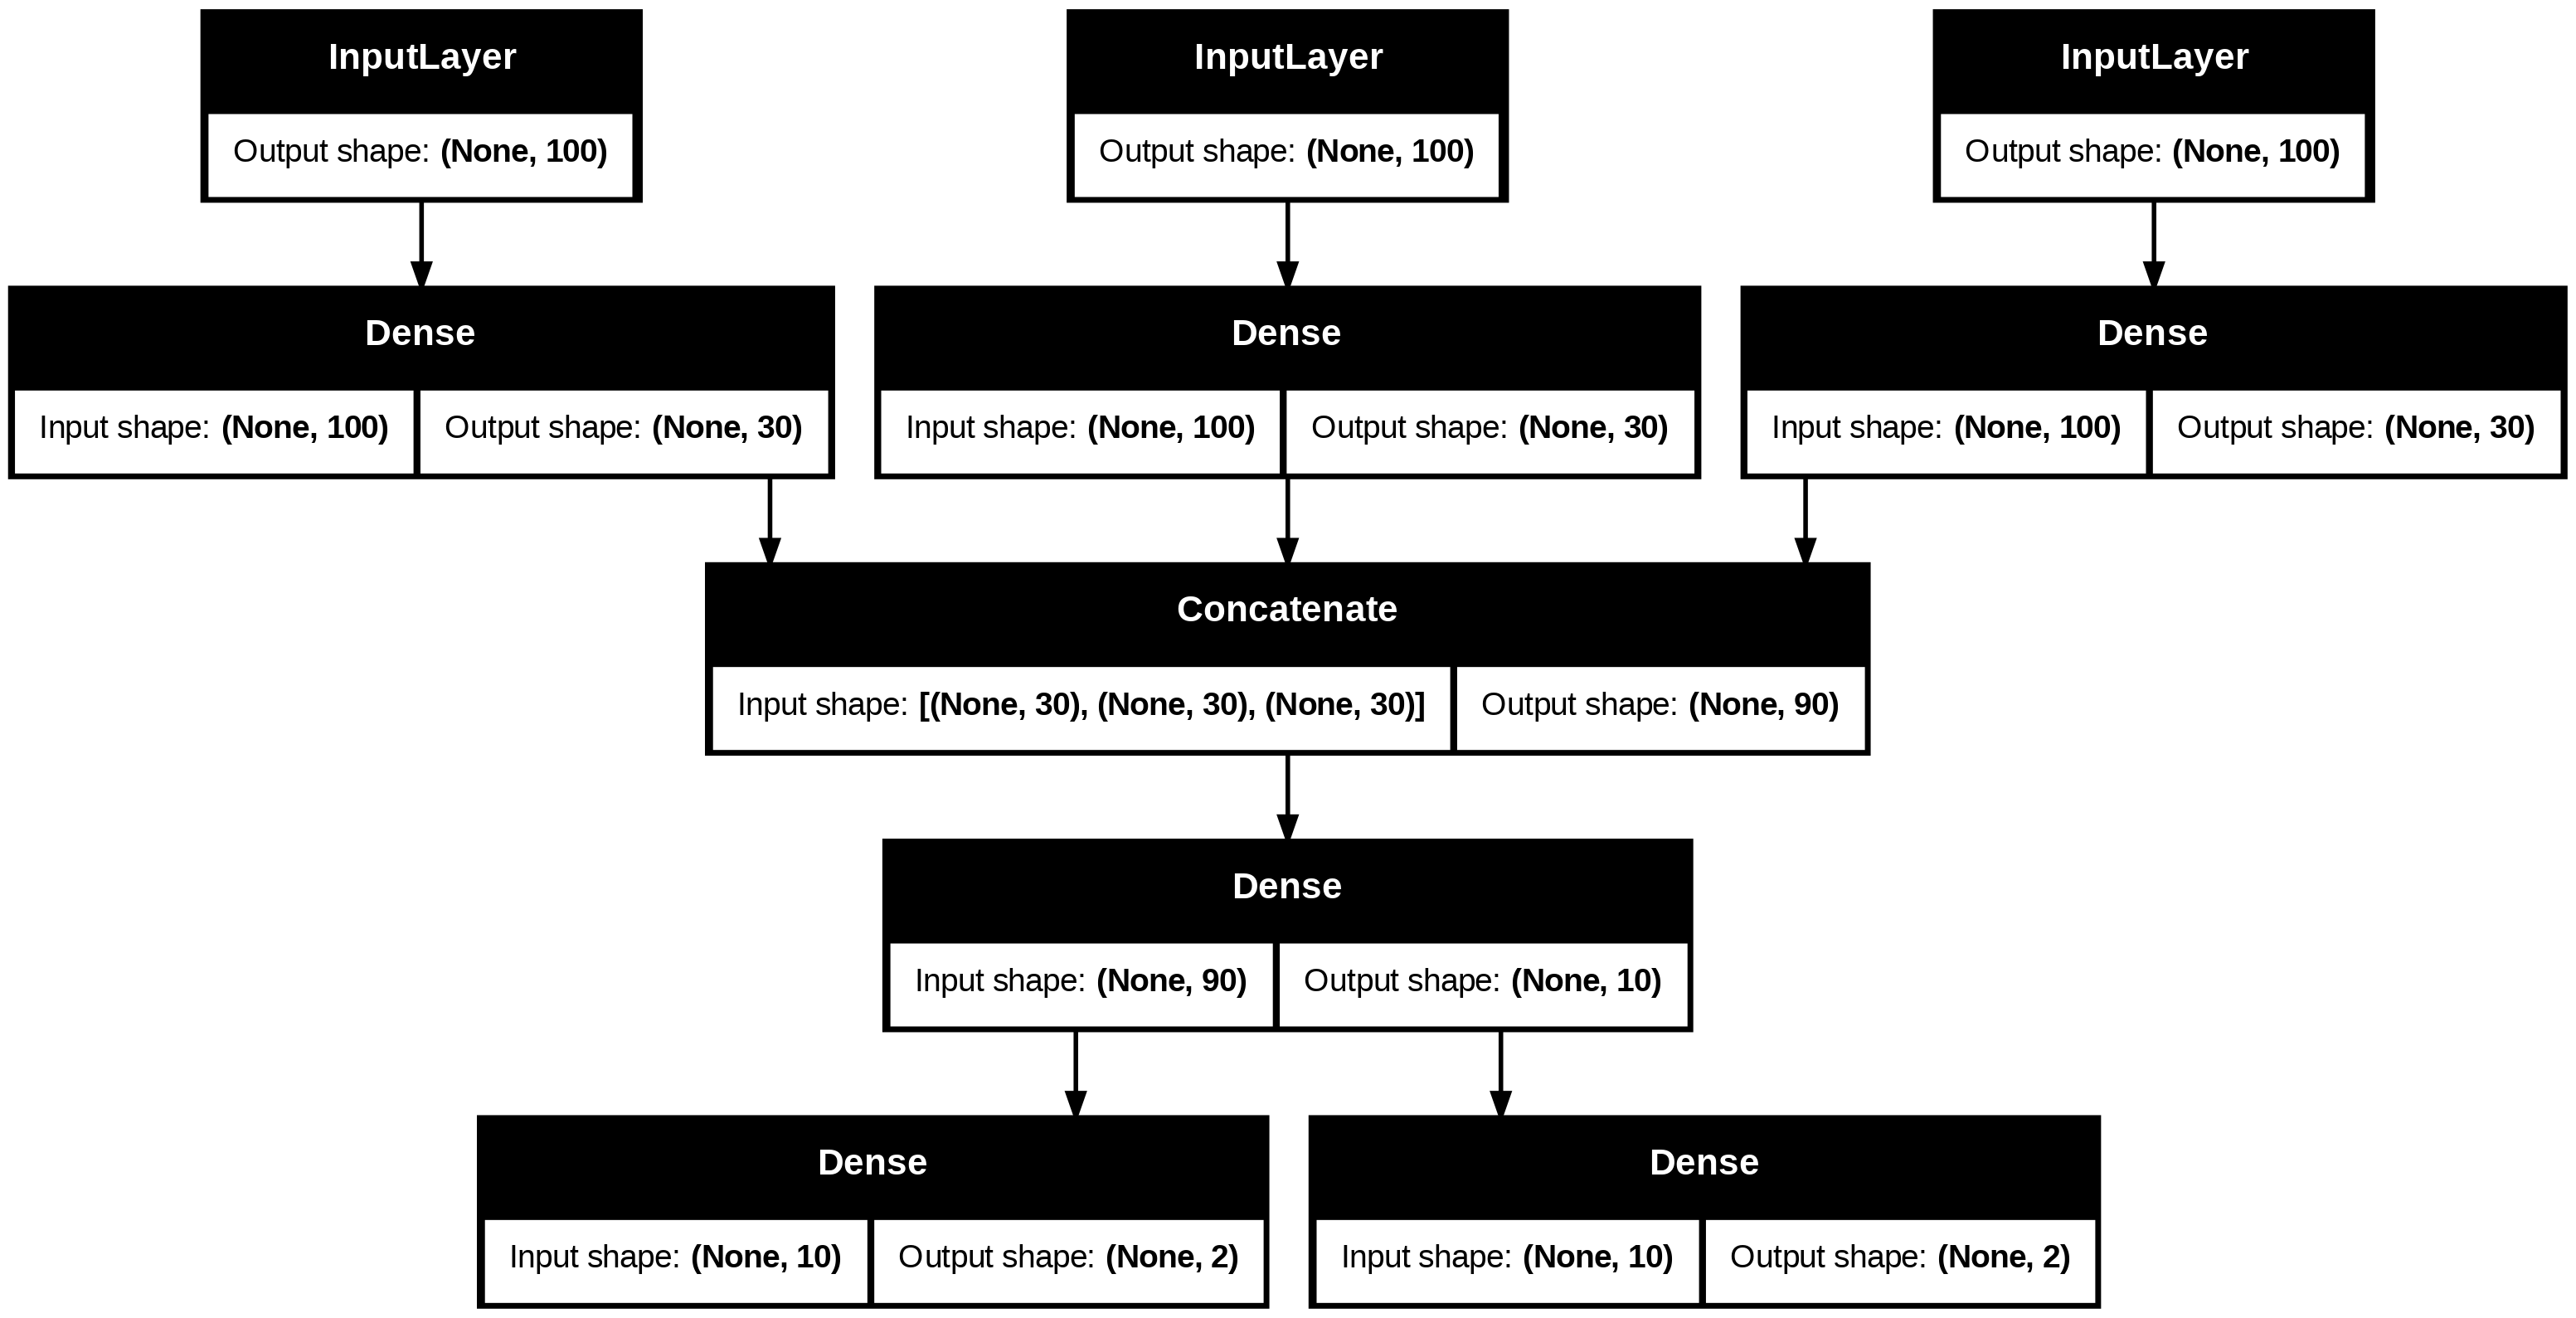

In [11]:
# define the layers
# input branch 1
x_in_1 = Input(shape=(100,))
x_1 = Dense(30)(x_in_1)
# input branch 2
x_in_2 = Input(shape=(100,))
x_2 = Dense(30)(x_in_2)
# input branch 3
x_in_3 = Input(shape=(100,))
x_3 = Dense(30)(x_in_3)
# merge features of all 3 branches
x = Concatenate()([x_1, x_2, x_3])
# layer with concatenated features as input
x = Dense(10)(x)
# two outputs
x_out_1 = Dense(2)(x)
x_out_2 = Dense(2)(x)
# define the model with multiple inputs and outputs
model = Model(inputs=[x_in_1, x_in_2, x_in_3], outputs=[x_out_1, x_out_2])
tf.keras.utils.plot_model(model, show_shapes=True)

**Skip connection**

TODO - Create a model with skip connection like on image below. With skip connection, previous layer is summed with one of the previoius layers. Use Add layer provided by Keras. Skip connection used like this (residual block) allow for training deeper networks.

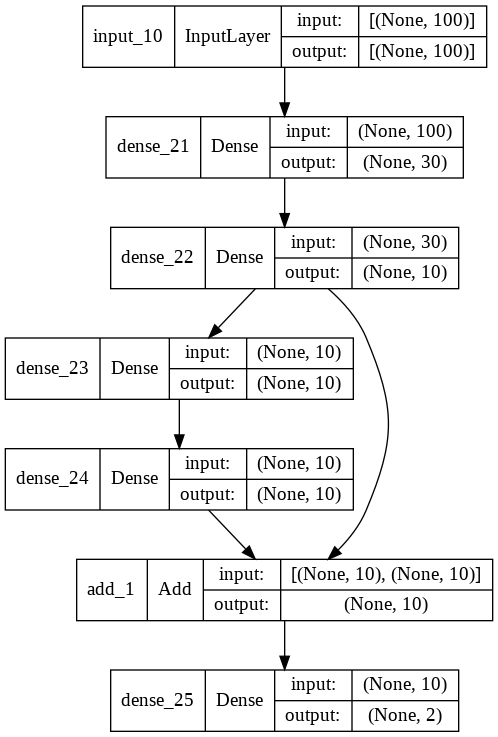

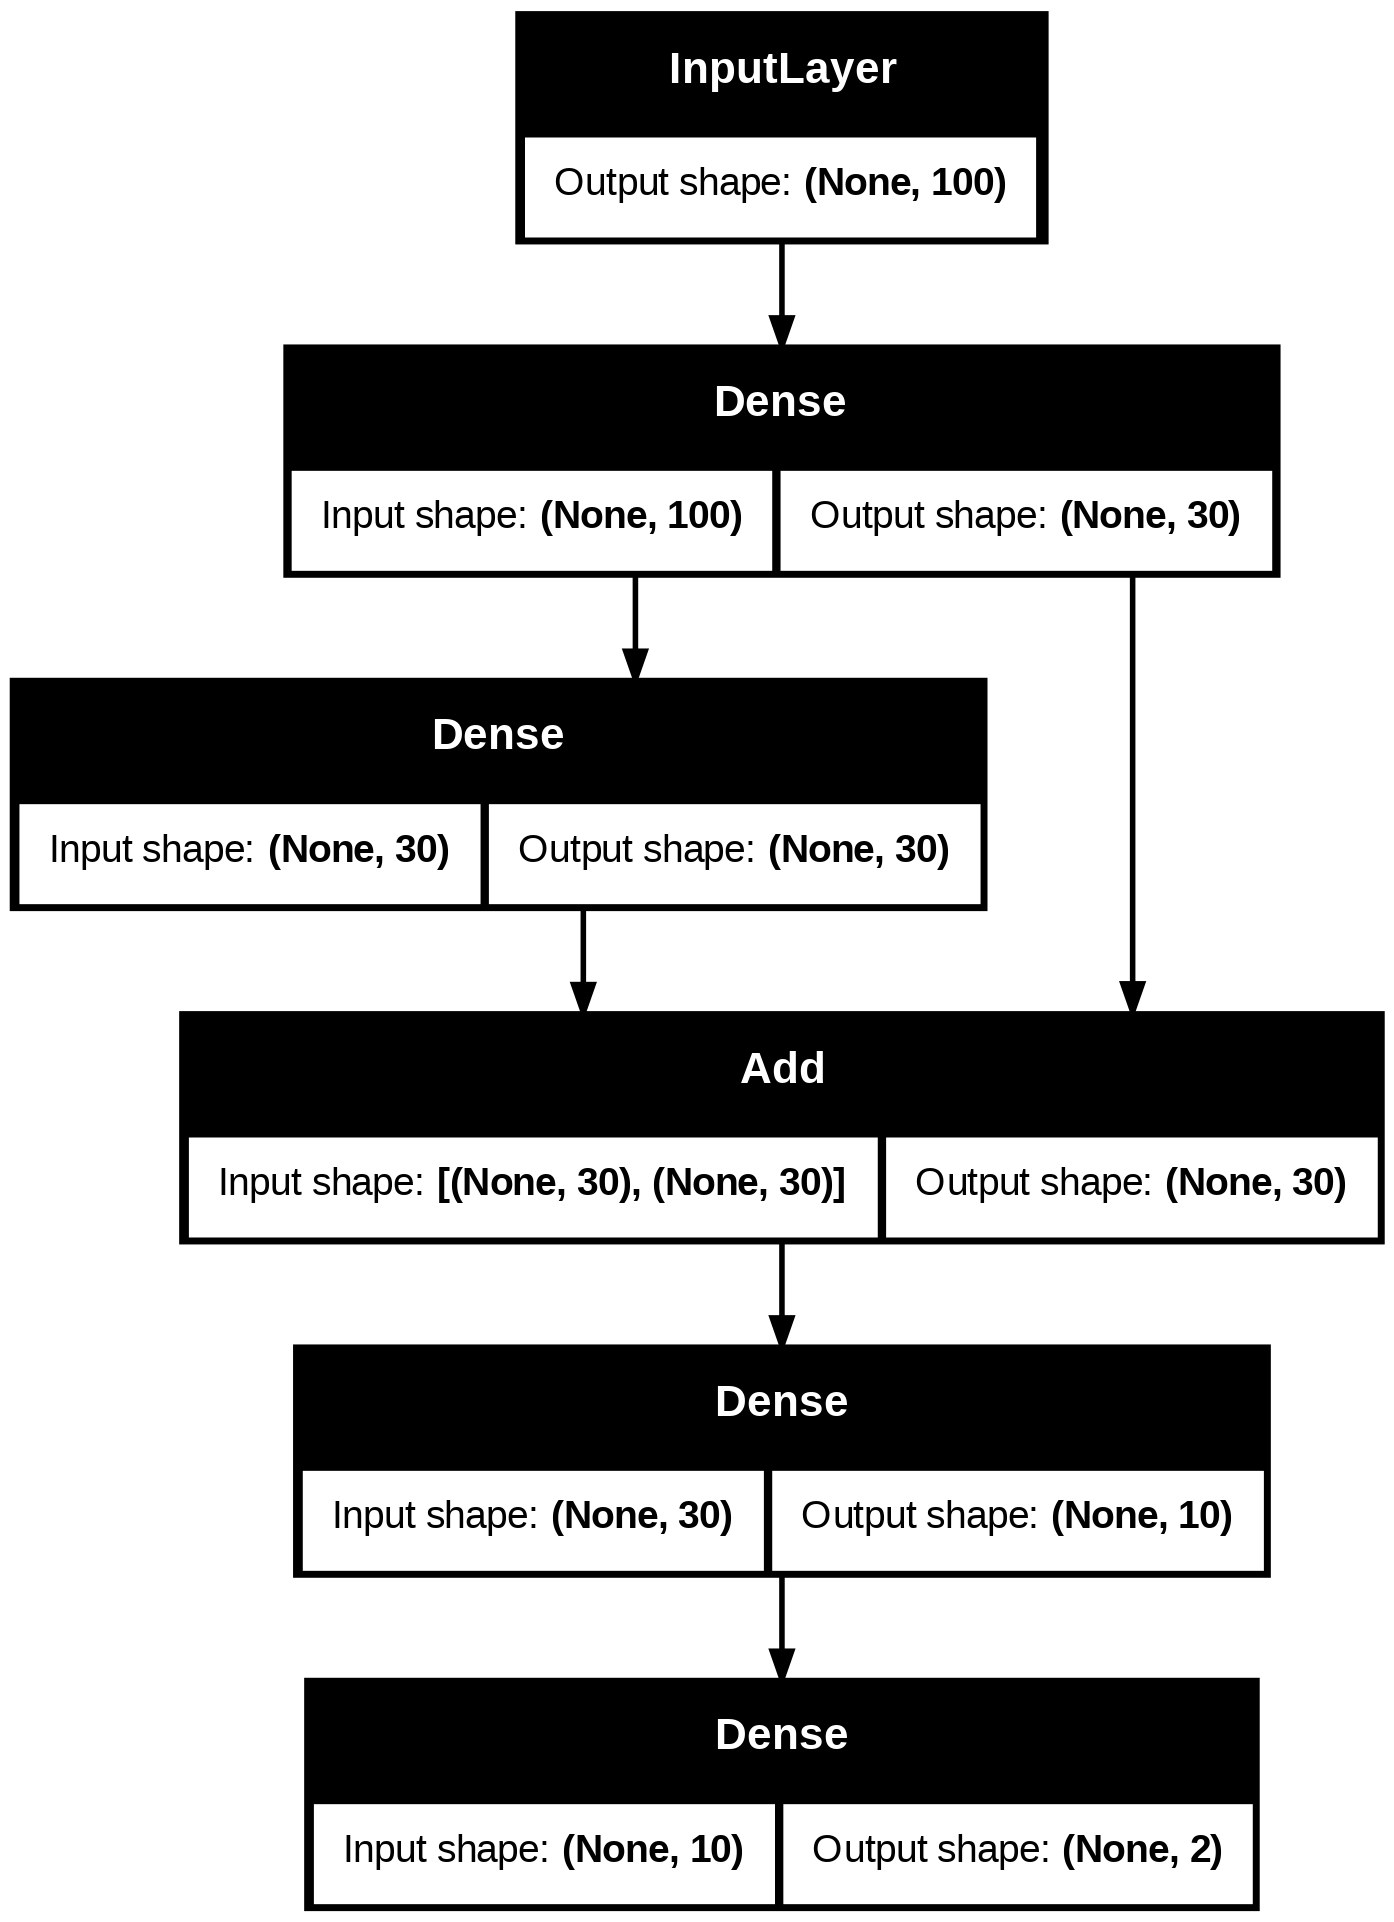

In [12]:
input_layer = Input(shape=(100,))

# Define the initial dense layers
x1 = Dense(30, activation='relu')(input_layer)
x2 = Dense(30, activation='relu')(x1)

# Implement a skip connection (residual connection)
skip_connection = Add()([x1, x2])

# Continue building the model after the skip connection
x3 = Dense(10, activation='relu')(skip_connection)
output_layer = Dense(2, activation='softmax')(x3)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Visualize the model structure
tf.keras.utils.plot_model(model, show_shapes=True)

**Convolutional MNIST classifier**

Define the model

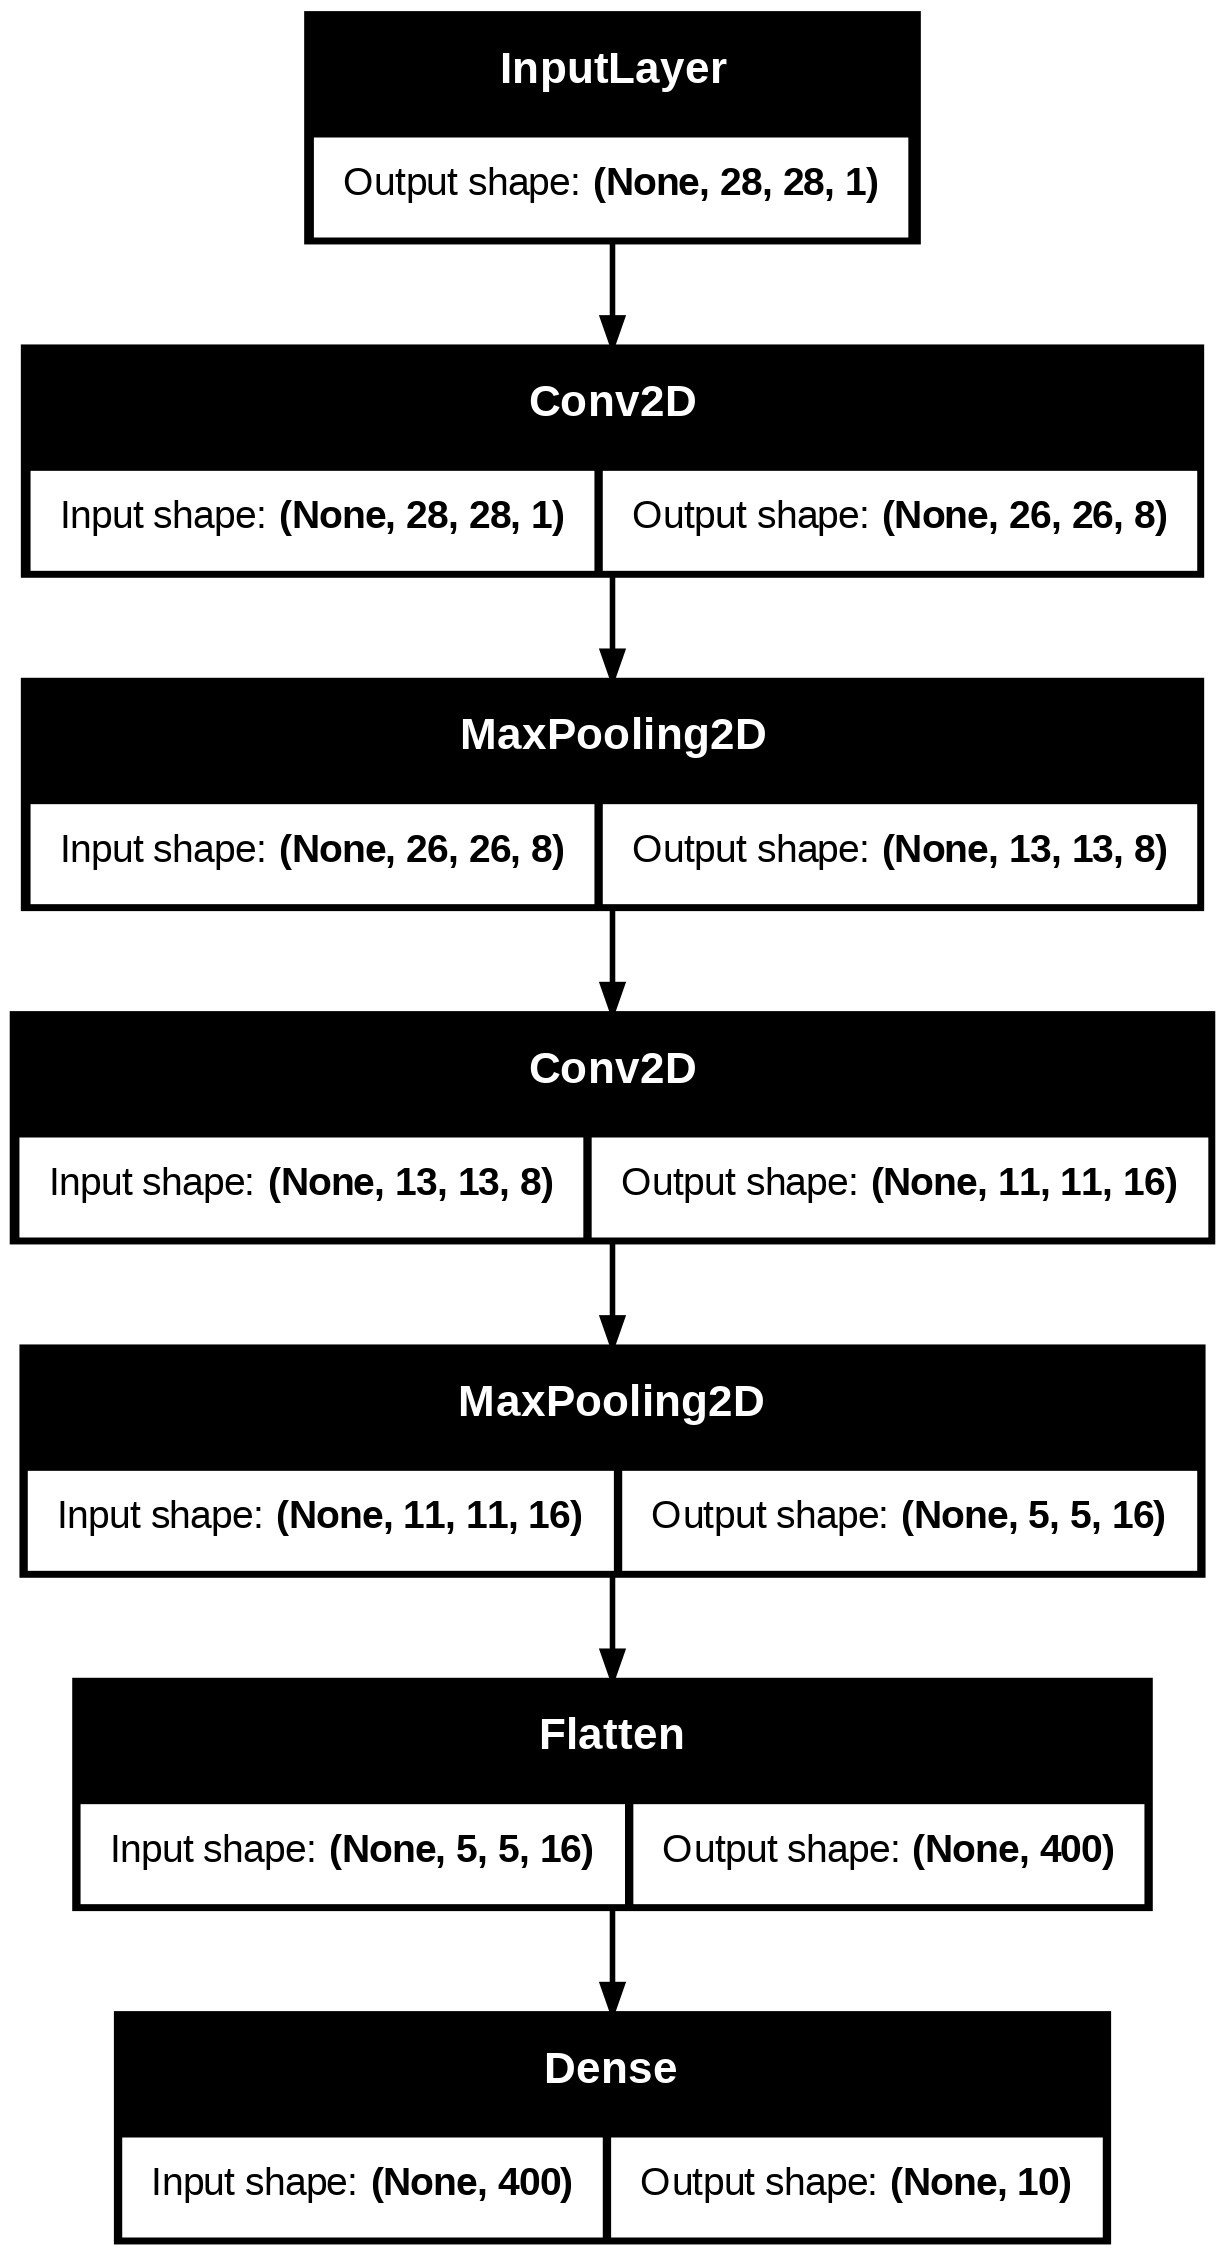

In [13]:
input_img = Input(shape=(28, 28, 1)) # Image should have 3 dimensions, even grayscale
x = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_img)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x_out = Dense(10, activation='softmax')(x)
model = Model(inputs=input_img, outputs=x_out)
tf.keras.utils.plot_model(model, show_shapes=True)

Compile the model

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

Load and preprocess data

In [15]:
def load_mnist():
  # load
  mnist_dataset = mnist.load_data()
  (trainset, testset) = (mnist_dataset[0], mnist_dataset[1])
  (X_train, y_train) = trainset
  (X_test, y_test) = testset
  # preprocess
  X_train = X_train.astype('float32')
  X_train /= 255
  X_test = X_test.astype('float32')
  X_test /= 255
  # Add another dimension to the data to account for the channels, greyscale = 1 channel
  X_train = X_train[..., np.newaxis]
  X_test = X_test[..., np.newaxis]
  # labels
  y_train = tf.one_hot(y_train, depth=10)
  y_test = tf.one_hot(y_test, depth=10)
  return X_train, y_train, X_test, y_test

Visualise data

In [16]:
def show_images(X, n_images=5):
  X_plot = np.squeeze(X)
  fig = plt.figure()
  for i in range(n_images):
    fig.add_subplot(1, n_images, i+1)
    plt.imshow(X_plot[i], cmap='gray')
  plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


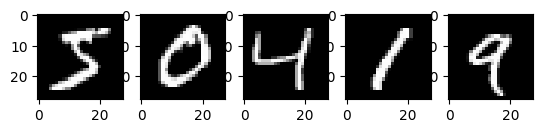

In [17]:
X_train, y_train, X_test, y_test = load_mnist()
show_images(X_train, n_images=5)

Train the model

In [18]:
history = model.fit(x=X_train, y=y_train, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5873 - loss: 1.4994 - val_accuracy: 0.9251 - val_loss: 0.2602
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9270 - loss: 0.2485 - val_accuracy: 0.9536 - val_loss: 0.1610
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9523 - loss: 0.1626 - val_accuracy: 0.9657 - val_loss: 0.1187
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9654 - loss: 0.1164 - val_accuracy: 0.9712 - val_loss: 0.0982
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.0981 - val_accuracy: 0.9728 - val_loss: 0.0876
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9724 - loss: 0.0884 - val_accuracy: 0.9763 - val_loss: 0.0782
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9766 - loss: 0.0762 - val_accuracy: 0.9773 - val_loss: 0.0727
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9786 - loss: 0.0708 - val_accuracy: 0

In [19]:
def plot_losses(history):
    losses = history.history
    plt.plot(losses['loss'], label='train loss')
    plt.plot(losses['val_loss'], label='val loss')
    plt.legend()
    plt.show()

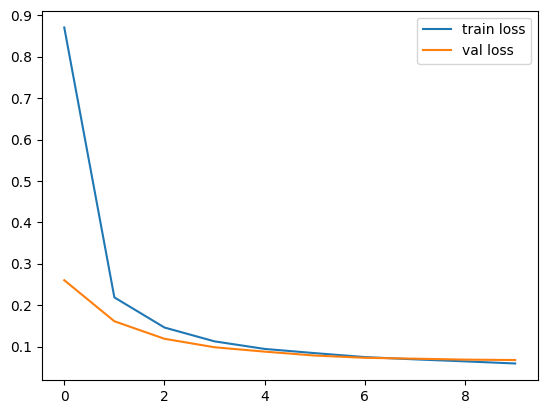

In [20]:
plot_losses(history)

Evaluate the model on test data

In [21]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9796 - loss: 0.0613


[0.05397338420152664, 0.9821000099182129]

**Convolutional MNIST autoencoder**

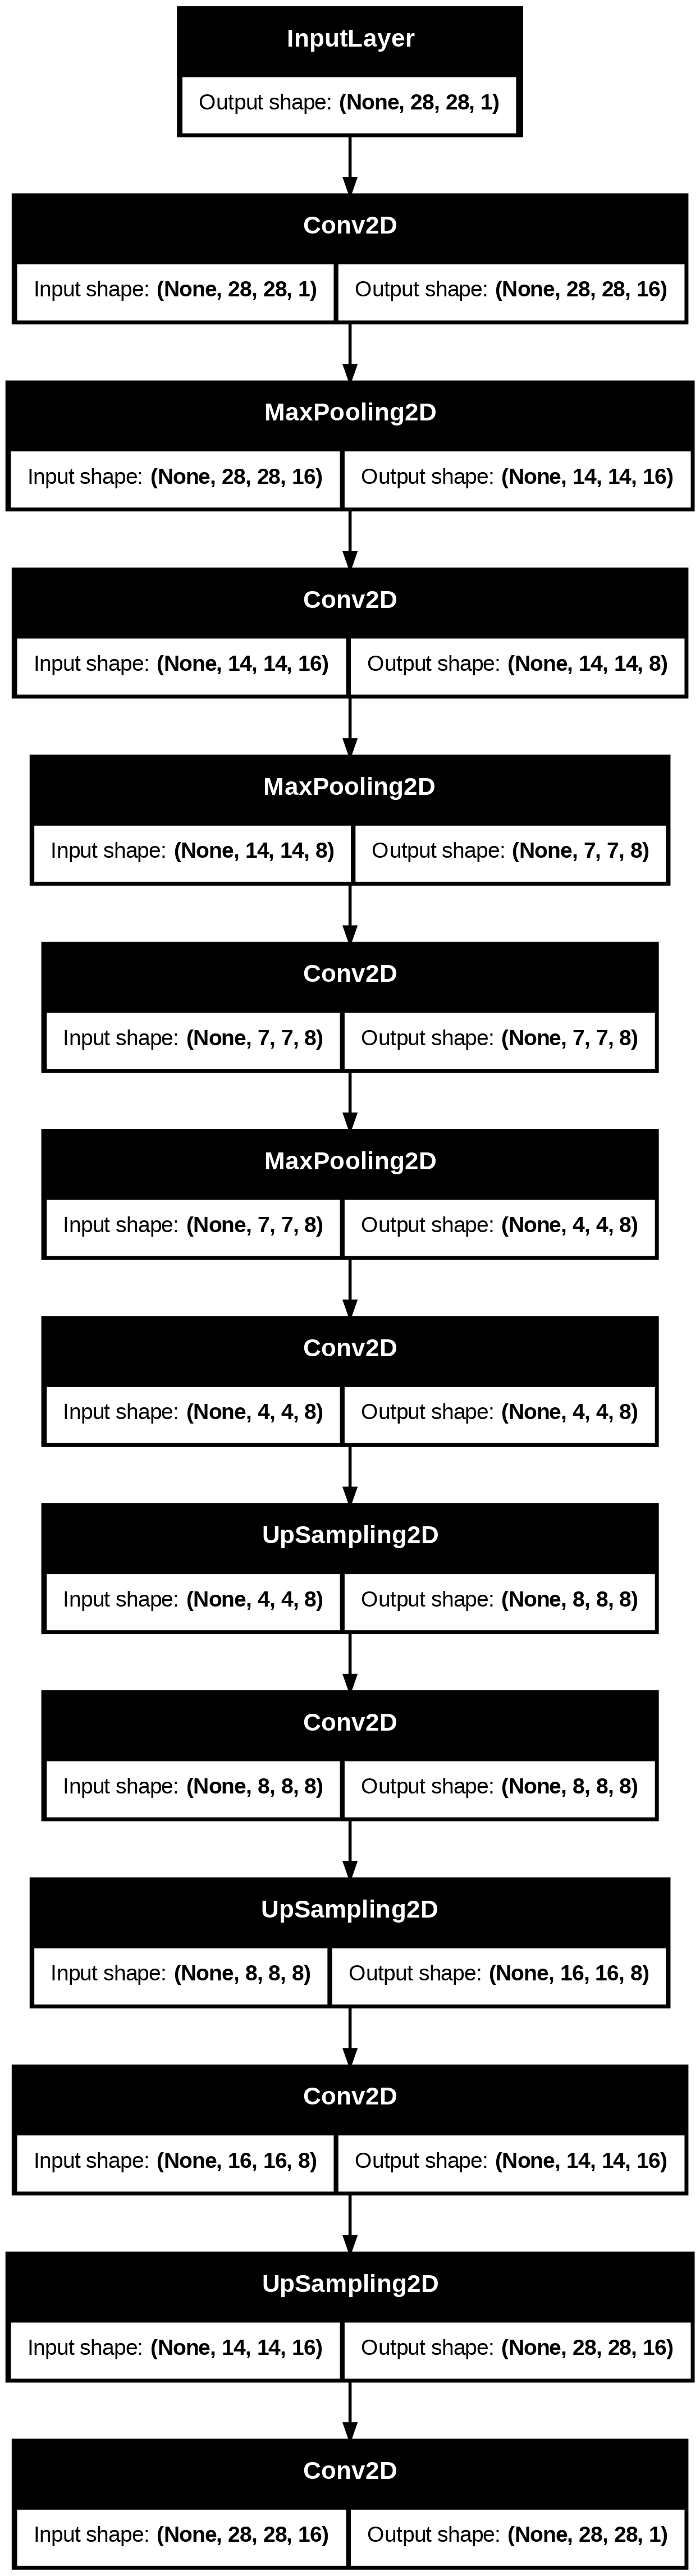

In [22]:
#########
# Define the model here
#########
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8), i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

model = Model(inputs=input_img, outputs=decoded)

optimiser = Adadelta(learning_rate=1.0)

model.compile(optimizer=optimiser, loss='mean_squared_error')

tf.keras.utils.plot_model(model, show_shapes=True)

In [23]:
history = model.fit(x=X_train, y=X_train, batch_size=256, epochs=10,
                    validation_split=0.2, shuffle=True)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.1208 - val_loss: 0.0529
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0511 - val_loss: 0.0469
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0446 - val_loss: 0.0400
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0395 - val_loss: 0.0365
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0365 - val_loss: 0.0333
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0339 - val_loss: 0.0328
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0315 - val_loss: 0.0312
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0296 - val_loss: 0.0299
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0282 - val_loss: 0.0273
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0268 - val_loss: 0.0258


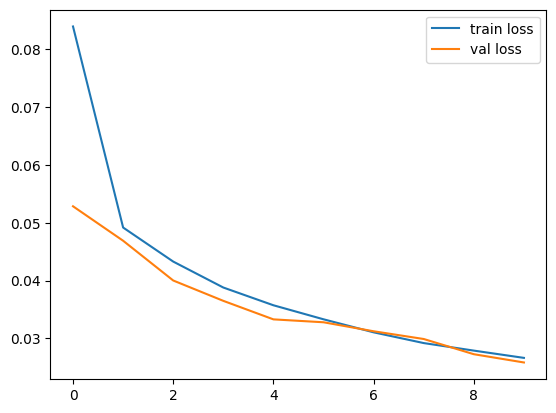

In [24]:
plot_losses(history)

Reconstruct images from the test set

In [25]:
n_images = 10
orig_images = X_test[:n_images]
decoded_images = model.predict(orig_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step


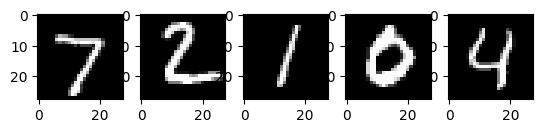

In [26]:
show_images(orig_images, 5)

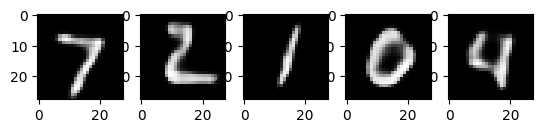

In [27]:
show_images(decoded_images, 5)

If the model is not reconstructiong well, run the below commands and train the model again.

In [28]:
#del model
#tf.keras.backend.clear_session()

When you're satisfied with the performance of the model, you can save it on your Google Drive account.

In [34]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [36]:
path = F"/content/gdrive/My Drive/ae_mnist.keras"

In [37]:
model.save(path)

If you reconnect later, you can load the model with the following command.

In [33]:
# model.load_weights(path)

**Train classifier on encoded data**

In Keras we build model as a graph of nodes. Multiple models can be defined on top of the same graph. We define the model by simply stating the starting and the ending node.

In [38]:
encoder = Model(input_img, encoded)

In [39]:
encoder.predict(orig_images).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


(10, 4, 4, 8)

TODO - Create and train classifier of encoded MNIST data with one softmax layer.

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5486 - loss: 1.4666 - val_accuracy: 0.8948 - val_loss: 0.3547
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9044 - loss: 0.3300 - val_accuracy: 0.9312 - val_loss: 0.2321
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9306 - loss: 0.2309 - val_accuracy: 0.9402 - val_loss: 0.1967
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9392 - loss: 0.1955 - val_accuracy: 0.9472 - val_loss: 0.1740
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9466 - loss: 0.1693 - val_accuracy: 0.9507 - val_loss: 0.1608
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9520 - loss: 0.1565 - val_accuracy: 0.9541 - val_loss: 0.1494
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9574 - loss: 0.1383 - val_accuracy: 0.9513 - val_loss: 0.1559
Epoch 8/10
188/188 

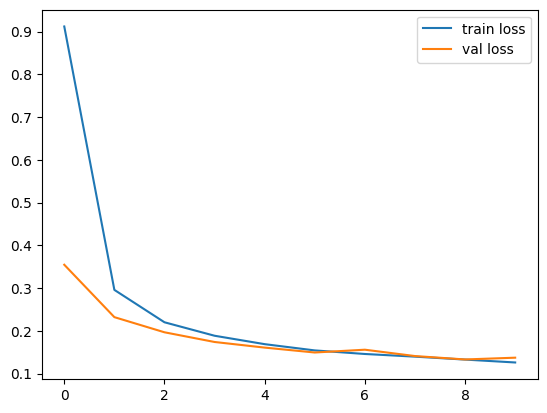

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9540 - loss: 0.1319


[0.11816306412220001, 0.9598000049591064]

In [44]:
# Define the classifier for the encoded data
encoded_input = Input(shape=(4, 4, 8))  # Shape based on the encoder's output
x = Flatten()(encoded_input)
x = Dense(64, activation='relu')(x)  # Add a dense layer to learn features from the encoded input
x = Dense(32, activation='relu')(x)
cl_output = Dense(10, activation='softmax')(x)  # Softmax layer for classification

# Define the classifier model
cl_model = Model(inputs=encoded_input, outputs=cl_output)

# Compile the classifier model
cl_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Generate encoded representations for the train and test sets
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Train the classifier on the encoded data
history_cl = cl_model.fit(x=X_train_encoded, y=y_train, batch_size=256, epochs=10, validation_split=0.2)

# Plot the training and validation loss for the classifier
plot_losses(history_cl)

# Evaluate the classifier on the test data
cl_model.evaluate(X_test_encoded, y_test)


It is also possible to create a model containing both encoder and a classifier, so we can do predictions directly on raw MNIST images.

In [47]:
# Create the combined model
ae_cl_out = cl_model(encoder(input_img))  # Get the classifier output using the encoder's output as input
ae_classifier = Model(inputs=input_img, outputs=ae_cl_out)  # Combine the input with the classifier's output




In [48]:
ae_classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [49]:
ae_classifier.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9540 - loss: 0.0000e+00


[0.0, 0.0, 0.9598000049591064, 0.9598000049591064]

TODO - Generate data with decoder


*   Define decoder model on top of the existing autoencoder
*   Generate random data of the same size as encoded data
*   Pass generated data through the decoder and plot the output

Can decoder generate good quality data?




Define decoder

In [50]:
# Define the decoder model
encoded_input = Input(shape=(4, 4, 8))  # Shape based on the encoder's output
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_input)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded_output = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create the decoder model
decoder = Model(inputs=encoded_input, outputs=decoded_output)


Generate random data

In [51]:
# Generate random data with the same shape as the encoded layer
gen_inp = np.random.normal(size=(10, 4, 4, 8))  # 10 examples of random encoded data


Pass generated data through the decoder

In [52]:
gen_out = decoder.predict(gen_inp)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Show reconstructions

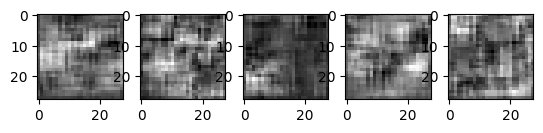

In [53]:
show_images(gen_out, n_images=5)

For more on Functional API: https://keras.io/guides/functional_api/

# Tensorflow low-level

In [54]:
cl_model.layers

[<InputLayer name=input_layer_16, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_33, built=True>,
 <Dense name=dense_34, built=True>,
 <Dense name=dense_35, built=True>]

Input to keras model is a tensor. Tensors are constants.

In [55]:
cl_model.input

<KerasTensor shape=(None, 4, 4, 8), dtype=float32, sparse=None, name=keras_tensor_76>

Weights of the model are tensor variables. Variables can change their value during training.

In [56]:
cl_model.layers[2].weights

[<KerasVariable shape=(128, 64), dtype=float32, path=dense_33/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=dense_33/bias>]

Create a tensor constant.

In [57]:
x = tf.constant([[1., 2., 3.],
             [4., 5., 6.]])


In [60]:
x = tf.Variable(x)

Tensors are immutable

In [61]:
x[0, 1].assign(10.0)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 1., 10.,  3.],
       [ 4.,  5.,  6.]], dtype=float32)>

Various operations that you can do with tensors.

In [62]:
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2., 20.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [63]:
5 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 50., 15.],
       [20., 25., 30.]], dtype=float32)>

In [64]:
tf.transpose(x)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 1.,  4.],
       [10.,  5.],
       [ 3.,  6.]], dtype=float32)>

Matrix multiplication

In [65]:
tf.matmul(x, tf.transpose(x))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[110.,  72.],
       [ 72.,  77.]], dtype=float32)>

Matrix multiplication shorter

In [66]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[110.,  72.],
       [ 72.,  77.]], dtype=float32)>

In [67]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=29.0>

Tensor that could be changed - variable. Variables are used for model weights.

In [68]:
x = tf.Variable(1.0)

**Gradient tape - example #1**

In [69]:
x = tf.Variable(1.0)

def f(x):
  y = x**2 + 2*x - 5
  return y

In [70]:
f(x)


<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

Calculate the gradient of f(x) with respect to x

In [71]:
with tf.GradientTape() as tape:
  y = f(x)

g_x = tape.gradient(y, x)

In [72]:
g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

Perform a step of gradient descent - change x to minimize f(x).

In [73]:
optimizer = tf.optimizers.SGD(learning_rate=0.01)
optimizer.apply_gradients(zip([g_x], [x]))


<KerasVariable shape=(), dtype=int64, path=SGD/iteration>

In [74]:
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.96>

In [75]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.1584>

**Gradient tape - example #2**

A step of gradient descent for multi-layer perceptron.

In [76]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  loss = tf.reduce_mean(y**2  )


In [77]:
w

<tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.91519123, -0.91232914],
       [-0.5562819 ,  0.24722116],
       [ 0.05428024, -0.79919785]], dtype=float32)>

In [78]:
b

<tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [79]:
[dl_dw, dl_db] = tape.gradient(loss, [w, b])

In [80]:
[dl_dw, dl_db]

[<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-1.8649144, -2.8154805],
        [-3.7298288, -5.630961 ],
        [-5.5947433, -8.446442 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1.8649144, -2.8154805], dtype=float32)>]

In [81]:
optimizer = tf.optimizers.SGD(learning_rate=0.01)
optimizer.apply_gradients(zip([dl_dw, dl_db], [w,b]))

<KerasVariable shape=(), dtype=int64, path=SGD/iteration>

In [82]:
w

<tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.8965421 , -0.88417435],
       [-0.51898366,  0.30353075],
       [ 0.11022767, -0.7147334 ]], dtype=float32)>

In [83]:
b

<tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0.01864914, 0.0281548 ], dtype=float32)>

TODO (optional, advanced) - Train multi-layer perceptron on MNIST flattened data for 10 steps using low-level Tensorflow.

When you need more than Keras can provide, you can mix TF and Keras:


*   Add TF operations to Keras models
*   Train Keras model using Gradient Tape and custom training loop instead of fit function
*   Define custom layers, loss functions, ...

